### Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import matplotlib.pyplot as plt

import pytorch_lightning as pl
from torch.utils.data.dataloader import DataLoader

import torch
from torch import nn

In [3]:
sys.path.append("..")
from src.experiments.student_teacher.run_experiment import ExperimentConfig
from src.experiments.harmonics.fc_net import FCNet

### Begin experimentation

1149 62.771358489990234


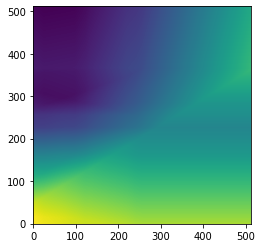

0 0.0


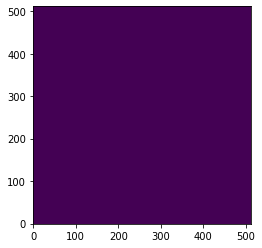

In [4]:
cfg = ExperimentConfig(
    teacher_sparsity=0.05,
    teacher_output_sparsity=1,
    teacher_seed=100,
)
cfg.base_net_cfg.sparsity=1e-12
cfg.base_net_cfg.output_sparsity=1e-12

teacher_net = cfg.get_teacher_net()
teacher_net.viz_2d(side_samples=512, pad=(3, 3), value=0.42, lo=-1, hi=1);
print(teacher_net.get_l0_norm().item(), teacher_net.get_l1_norm().item())
plt.show();

student_net = cfg.get_student_net()
student_net.viz_2d(side_samples=512, pad=(3, 3), value=0.42, lo=-1, hi=1);
print(student_net.get_l0_norm().item(), student_net.get_l1_norm().item())

In [5]:
cfg.data_cfg.n_val = 1024
dm = cfg.get_dm(net=teacher_net)
dm.setup()

In [6]:
def _get_mse(dl: DataLoader, net: FCNet):
    return pl.Trainer(
        gpus=1,
        logger=False,
        enable_progress_bar=False,
        weights_summary=None,
    ).test(model=net, dataloaders=dl, verbose=False,)[0]["test_mse"]

_get_mse(dm.val_dataloader(), net=student_net)

0.00313015840947628